# Wells

A tutorial on Wells component.

### Content
* [Basic properties](#Basic-properties)
* [Tree transformations](#Tree-transformations)
* [Blocks evaluation](#Blocks-evaluation)

## Basic properties

Required imports:

In [1]:
import sys
import numpy as np
sys.path.append('..')

from deepfield import Field, Wells

Load a model (this is the HDF5 model created in the first [tutorial](./01.Basics.ipynb)):

In [2]:
model = Field(path='./norne_simplified.hdf5').load()

INFO:Field:===== Field summary =====
INFO:Field:AQUIFERS attributes: 
INFO:Field:GRID attributes: MAPAXES, ACTNUM, COORD, DIMENS, ZCORN
INFO:Field:ROCK attributes: PERMX, PERMY, PERMZ, PORO
INFO:Field:STATES attributes: PRESSURE, RS, SGAS, SOIL, SWAT
INFO:Field:TABLES attributes: DENSITY, PVDG, PVTO, PVTW, ROCK, SGOF, SWOF
INFO:Field:WELLS attributes: WCONPROD, COMPDAT, WELSPECS, WFRAC, WELLTRACK, WCONINJE
INFO:Field:=========================


Wells can be quickly visualized using `show_wells` (hint: uncomment `%matplotlib notebook` to enable interactive mode):

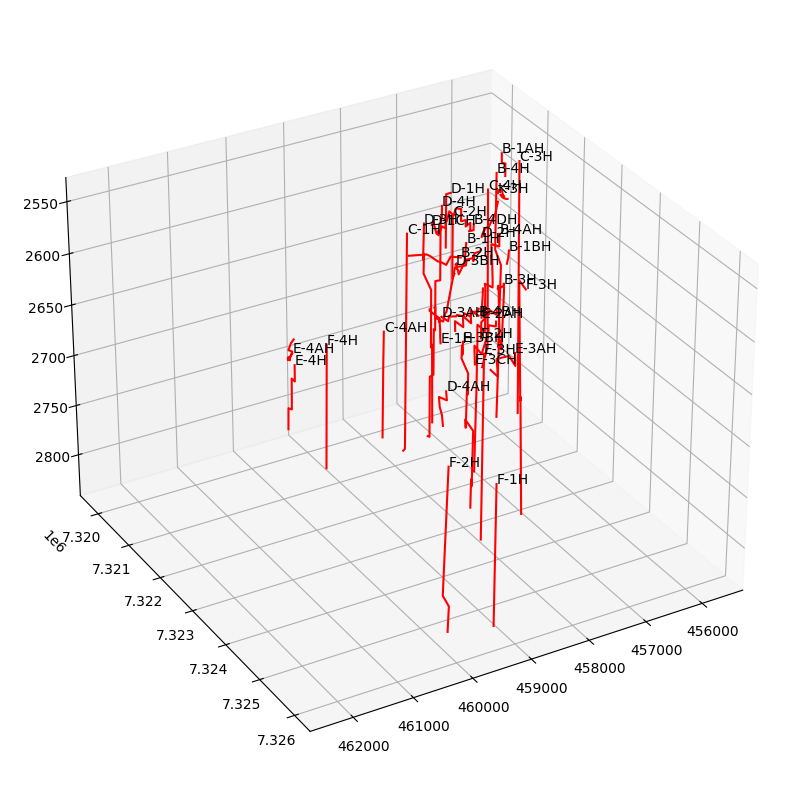

In [3]:
# %matplotlib notebook
model.wells.show_wells(figsize=(10, 10))

Under the hood of the component, wells are organized in a tree. Root is a Field itself, nodes are groups of wells or well segments:

In [4]:
model.wells.render_tree()

FIELD
|-- INJE
|   |-- MANI-C
|   |   |-- C-1H
|   |   |-- C-2H
|   |   |-- C-3H
|   |   |-- C-4AH
|   |   +-- C-4H
|   |-- MANI-F
|   |   |-- F-1H
|   |   |-- F-2H
|   |   |-- F-3H
|   |   +-- F-4H
|   +-- WI-GSEG
+-- PROD
    |-- MANI-B1
    |   |-- B1-DUMMY
    |   |   |-- B-2H
    |   |   |-- B-4AH
    |   |   |-- B-4BH
    |   |   |-- B-4DH
    |   |   +-- B-4H
    |   +-- MANI-K1
    |-- MANI-B2
    |   |-- B-1AH
    |   |-- B-1BH
    |   |-- B-1H
    |   +-- B-3H
    |-- MANI-D1
    |   |-- D-1CH
    |   |-- D-1H
    |   |-- D-3AH
    |   |-- D-3BH
    |   +-- D-3H
    |-- MANI-D2
    |   |-- D2-DUMMY
    |   |   |-- D-2H
    |   |   |-- D-4AH
    |   |   +-- D-4H
    |   +-- MANI-K2
    |       +-- K-3H
    |-- MANI-E1
    |   |-- E-1H
    |   |-- E-3AH
    |   |-- E-3BH
    |   |-- E-3CH
    |   +-- E-3H
    +-- MANI-E2
        |-- E-2AH
        |-- E-2H
        |-- E-4AH
        +-- E-4H


Nodes of tree can be accessed by names, e.g.:

In [5]:
model.wells['C-4H']

Node's `name` is a short name, while `fullname` includes parents up to the root:

In [6]:
print('Name:', model.wells['C-4H'].name)
print('Fullname:', model.wells['C-4H'].fullname)

Name: C-4H
Fullname: INJE/MANI-C/C-4H


One can iterate over tree to get all well segments (groups are excluded be default):

In [7]:
np.array([node.name for node in model.wells])

array(['C-1H', 'C-2H', 'C-3H', 'C-4AH', 'C-4H', 'F-1H', 'F-2H', 'F-3H',
       'F-4H', 'B-2H', 'B-4AH', 'B-4BH', 'B-4DH', 'B-4H', 'B-1AH',
       'B-1BH', 'B-1H', 'B-3H', 'D-1CH', 'D-1H', 'D-3AH', 'D-3BH', 'D-3H',
       'D-2H', 'D-4AH', 'D-4H', 'K-3H', 'E-1H', 'E-3AH', 'E-3BH', 'E-3CH',
       'E-3H', 'E-2AH', 'E-2H', 'E-4AH', 'E-4H'], dtype='<U5')

Nodes have attributes:

In [8]:
model.wells['C-4H'].attributes

('COMPDAT', 'WCONINJE', 'WCONPROD', 'WELLTRACK', 'WELSPECS', 'WFRAC')

Example of `WFRAC` table:

In [9]:
model.wells['C-4H'].wfrac

,DATE,WELL,I1,J1,K1,I2,J2,K2,AZIMUTH_ANGLE,ZENITH_ANGLE,HALF_LENGTH,WIDTH,PROPPANT,FLOW_FUNCTION,PHASE
0,1997-11-06,C-4H,11,35,1,11,35,2,30.0,0.0,10.0,0.00001,None,None,None


## Tree transformations

One can drop a node or a group:

In [10]:
model.wells.drop('INJE')
model.wells.render_tree()

FIELD
+-- PROD
    |-- MANI-B1
    |   |-- B1-DUMMY
    |   |   |-- B-2H
    |   |   |-- B-4AH
    |   |   |-- B-4BH
    |   |   |-- B-4DH
    |   |   +-- B-4H
    |   +-- MANI-K1
    |-- MANI-B2
    |   |-- B-1AH
    |   |-- B-1BH
    |   |-- B-1H
    |   +-- B-3H
    |-- MANI-D1
    |   |-- D-1CH
    |   |-- D-1H
    |   |-- D-3AH
    |   |-- D-3BH
    |   +-- D-3H
    |-- MANI-D2
    |   |-- D2-DUMMY
    |   |   |-- D-2H
    |   |   |-- D-4AH
    |   |   +-- D-4H
    |   +-- MANI-K2
    |       +-- K-3H
    |-- MANI-E1
    |   |-- E-1H
    |   |-- E-3AH
    |   |-- E-3BH
    |   |-- E-3CH
    |   +-- E-3H
    +-- MANI-E2
        |-- E-2AH
        |-- E-2H
        |-- E-4AH
        +-- E-4H


Nodes can be grouped in a new group and attached to the root:

In [11]:
model.wells.group(['MANI-E1','MANI-E2'], 'MANI-E')
model.wells.render_tree()

FIELD
|-- PROD
|   |-- MANI-B1
|   |   |-- B1-DUMMY
|   |   |   |-- B-2H
|   |   |   |-- B-4AH
|   |   |   |-- B-4BH
|   |   |   |-- B-4DH
|   |   |   +-- B-4H
|   |   +-- MANI-K1
|   |-- MANI-B2
|   |   |-- B-1AH
|   |   |-- B-1BH
|   |   |-- B-1H
|   |   +-- B-3H
|   |-- MANI-D1
|   |   |-- D-1CH
|   |   |-- D-1H
|   |   |-- D-3AH
|   |   |-- D-3BH
|   |   +-- D-3H
|   +-- MANI-D2
|       |-- D2-DUMMY
|       |   |-- D-2H
|       |   |-- D-4AH
|       |   +-- D-4H
|       +-- MANI-K2
|           +-- K-3H
+-- MANI-E
    |-- MANI-E1
    |   |-- E-1H
    |   |-- E-3AH
    |   |-- E-3BH
    |   |-- E-3CH
    |   +-- E-3H
    +-- MANI-E2
        |-- E-2AH
        |-- E-2H
        |-- E-4AH
        +-- E-4H


At each node we can start a new Wells with root poining to this node:

In [12]:
wells = Wells(model.wells['MANI-B2'])
wells.render_tree()

MANI-B2
|-- B-1AH
|-- B-1BH
|-- B-1H
+-- B-3H


## Blocks evaluation

Quite often wells are given via trajectories (i.e. using the WELLTRACK keyword). In this case we need to define grid blocks intersected by the well. A ray casting algorithm implemented in the method `get_wellblocks` finds blocks intersected by wells trajectories:

In [13]:
model.wells.get_blocks()
model.wells.apply_perforations()

Now attribute `blocks` shows block indices:

In [14]:
model.wells['B-1AH'].blocks

array([[ 8, 24,  2],
       [ 9, 23,  1],
       [ 8, 23,  1],
       [ 8, 24,  1],
       [ 9, 23,  0]])

An additional attribute BLOCKS_INFO contains various block measurements:

In [15]:
model.wells['B-1AH'].blocks_info

,PERF_RATIO,CF,SKIN
0,1.0,6.676,0.0
1,1.0,18.326,0.0
2,1.0,34.389,0.0
3,1.0,11.633,0.0
4,1.0,73.447,0.0


Done! This tutorial is far from complete, e.g. we do not discuss implemented rates calculation methods as well as many other more specific preprocessing actions. We will partially cover them in the next notebooks.